<a href="https://colab.research.google.com/github/michellegallegoabril/EJERCICIOS-Y-PARCIALES/blob/main/3_SerieyTransformadaFourier/youtube_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Base de datos canciones**

#Cargar las librerias

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

##Cargar la base de datos

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta al archivo de la hoja de cálculo en Google Drive
path_to_file = '/content/drive/MyDrive/Colab Notebooks/canciones.xlsx'

# Cargar la hoja de cálculo en un DataFrame de pandas
X = pd.read_excel(path_to_file)
X

LINK  \
0   https://youtu.be/ZhIsAZO5gl0?si=5wUrKB231ztFVzD6   
1   https://youtu.be/5KlN9ujUw0s?si=9JvemUbBPzyWPBUG   
2   https://youtu.be/95QZvA7swMU?si=RjaS2PhPLIuMxn-P   
3   https://youtu.be/b4MaGKfc1-0?si=TFC29RcEJGX5nyAt   
4   https://youtu.be/UIl27cgpKaw?si=s9tURpmIi1ss9RxN   
5   https://youtu.be/2g5xkLqIElU?si=EPuQ6eukIqSbYGA0   
6   https://youtu.be/Ckom3gf57Yw?si=Q-lw4CMJbjxsx4o0   
7   https://youtu.be/AVEDgT_lG60?si=LpjdrWneaBLc-Bvv   
8   https://youtu.be/7h2ryr_uUEs?si=1PDNrnPK72O7xSZD   
9   https://youtu.be/6JqnbsQpljU?si=9VqryQyyE6Qv2atZ   
10  https://youtu.be/jzy2dgEUOhY?si=SoqBatGcFFPCusOf   
11  https://youtu.be/p-Z3YrHJ1sU?si=wU66Q7ZfbI_7VLiz   
12  https://youtu.be/TWMZfRuJPz0?si=GMrDxDrSSofR3fZq   
13  https://youtu.be/6ACl8s_tBzE?si=_0xEzjo7hizOb_WG   
14  https://youtu.be/K3JGxj2rvAs?si=eF8NLml09Aofr_cg   
15  https://youtu.be/u9n7Cw-4_HQ?si=b4PT4QZCaoQ2uUv5   
16  https://youtu.be/JVpTp8IHdEg?si=OgsCBy1cG27rqrI-   
17  https://youtu.be/J9NQFACZYEU?si=LYTezgxLqAKnO43V   
18  https://youtu.be/b5v2o6Mgfg8?si=PPWtoUxhnVPI56YE   
19  https://youtu.be/rCkewbpbP8w?si=oAeUd1qCiRPKC7L8   

                         NOMBRE                             ARTISTA GENERO  \
0     I Was Made For Lovin' You                                Kiss   Rock   
1            Labios Compartidos                                Mana   Rock   
2                        Afuera                            Caifanes   Rock   
3                  Nubes Negras                      Los de Adentro   Rock   
4                  Mujer Amante                         Rata Blanca   Rock   
5                    Borderline                         Tame Impala   Rock   
6                The Unforgiven                           Metallica   Rock   
7      En la Ciudad de la Furia                         Soda Stereo   Rock   
8                  Labios Rotos                                 Zoé   Rock   
9               Tabaco y Chanel                             Bacilos   Rock   
10                    Infinity                    Guru Josh Project  House   
11                  Stereo Love         Edward Maya & Vika Jigulina  House   
12                     Shine On                               R.I.O  House   
13                        Blame                       Calvin Harris  House   
14              I Follow Rivers                           Lykke Li   House   
15              Moth To A Flame  Swedish House Mafia and The Weeknd  House   
16                  Hear Me Now     Alok, Bruno Martini feat. Zeeba  House   
17                     Outside                        Calvin Harris  House   
18  Little Things x Gypsy Woman                        Jorja Smith   House   
19                   Chiquetere                             Paskman  House   

    TYPE_NUM  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1  
8          1  
9          1  
10         2  
11         2  
12         2  
13         2  
14         2  
15         2  
16         2  
17         2  
18         2  
19         2

In [4]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 8.4 MB/s eta 0:00:00
  Created w

In [6]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'LINK']}\n")
    print(f"ARTISTA: {X.loc[n,'ARTISTA']}\n")
    print(f"GENERO: {X.loc[n,'GENERO']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'ARTISTA']+"_"+str(n)+"_"+str(X.loc[n,'TYPE_NUM']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'LINK'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

Carpeta results ya existe
video 1 de 20
link: https://youtu.be/ZhIsAZO5gl0?si=5wUrKB231ztFVzD6

ARTISTA: Kiss

GENERO: Rock

[youtube] Extracting URL: https://youtu.be/ZhIsAZO5gl0?si=5wUrKB231ztFVzD6
[youtube] ZhIsAZO5gl0: Downloading webpage
[youtube] ZhIsAZO5gl0: Downloading ios player API JSON
[youtube] ZhIsAZO5gl0: Downloading android player API JSON
[youtube] ZhIsAZO5gl0: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZhIsAZO5gl0
[youtube] ZhIsAZO5gl0: Downloading webpage
[youtube] ZhIsAZO5gl0: Downloading ios player API JSON
[youtube] ZhIsAZO5gl0: Downloading android player API JSON
[youtube] ZhIsAZO5gl0: Downloading m3u8 information
[info] ZhIsAZO5gl0: Downloading 1 format(s): 251
[download] Destination: results/Kiss_0_1.mp3
[download] 100% of    3.45MiB in 00:00:00 at 9.51MiB/s   
Download complete... results/Kiss_0_1.mp3
video 2 de 20
link: https://youtu.be/5KlN9ujUw0s?si=9JvemUbBPzyWPBUG

ARTISTA: Mana

GENERO: Rock

[youtube] Extractin

In [7]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Soda Stereo_7_1.wav',
 'R.I.O_12_2.wav',
 'Caifanes_2_1.wav',
 'Jorja Smith _18_2.wav',
 'Guru Josh Project_10_2.wav',
 'Calvin Harris_13_2.wav',
 'Calvin Harris_17_2.wav',
 'Los de Adentro_3_1.wav',
 'Mana_1_1.wav',
 'Edward Maya & Vika Jigulina_11_2.wav',
 'Rata Blanca_4_1.wav',
 'Bacilos_9_1.wav',
 'Swedish House Mafia and The Weeknd_15_2.wav',
 'Kiss_0_1.wav',
 'Metallica_6_1.wav',
 'Zoé_8_1.wav',
 'Lykke Li _14_2.wav',
 'Alok, Bruno Martini feat. Zeeba_16_2.wav',
 'Paskman_19_2.wav',
 'Tame Impala_5_1.wav']

In [8]:
!pip install soundfile #instalar sondfile

In [9]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: Soda Stereo_7_1.wav; segundo 40:45; tipo música [1.]
1 lectura: Soda Stereo_7_1.wav; segundo 50:55; tipo música [1.]
2 lectura: Soda Stereo_7_1.wav; segundo 60:65; tipo música [1.]
3 lectura: Soda Stereo_7_1.wav; segundo 70:75; tipo música [1.]
4 lectura: Soda Stereo_7_1.wav; segundo 80:85; tipo música [1.]
5 lectura: Soda Stereo_7_1.wav; segundo 90:95; tipo música [1.]
6 lectura: Soda Stereo_7_1.wav; segundo 100:105; tipo música [1.]
7 lectura: R.I.O_12_2.wav; segundo 40:45; tipo música [2.]
8 lectura: R.I.O_12_2.wav; segundo 50:55; tipo música [2.]
9 lectura: R.I.O_12_2.wav; segundo 60:65; tipo música [2.]
10 lectura: R.I.O_12_2.wav; segundo 70:75; tipo música [2.]
11 lectura: R.I.O_12_2.wav; segundo 80:85; tipo música [2.]
12 lectura: R.I.O_12_2.wav; segundo 90:95; tipo música [2.]
13 lectura: R.I.O_12_2.wav; segundo 100:105; tipo música [2.]
14 lectura: Caifanes_2_1.wav; segundo 40:45; tipo música [1.]
15 lectura: Caifanes_2_1.wav; segundo 50:55; tipo música [1.]
16 lect

(140, 240000, 2)

In [10]:
from IPython.display import Audio #reproducir segmento
i = 10
Audio(x_t[i].T,rate=fs)

In [11]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(140, 120001)

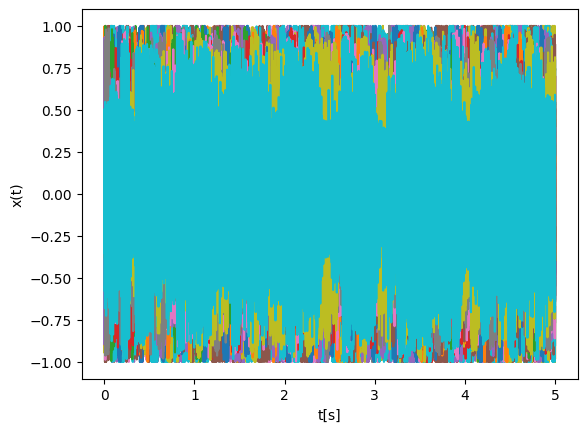

In [12]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

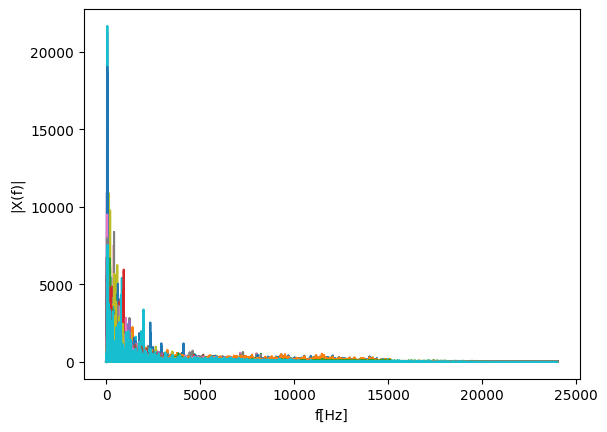

In [13]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

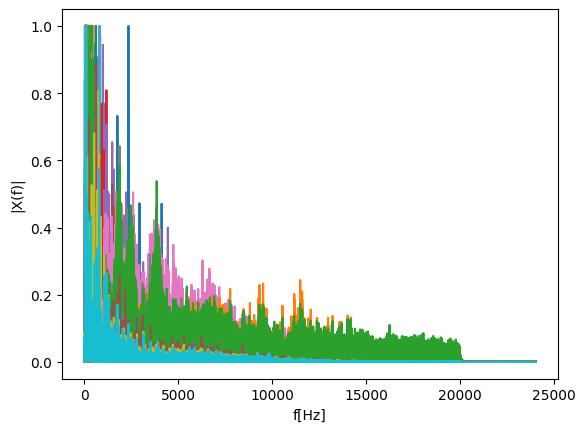

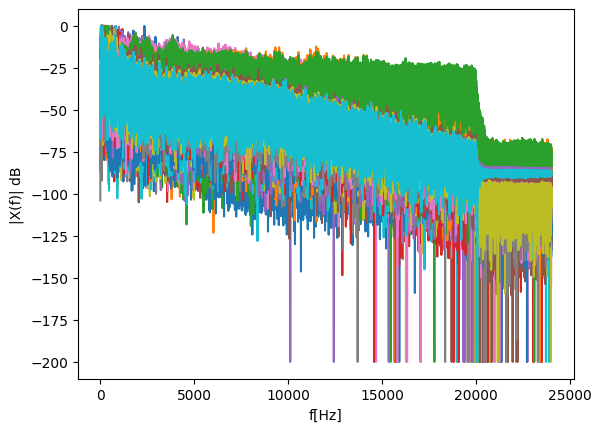

In [14]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

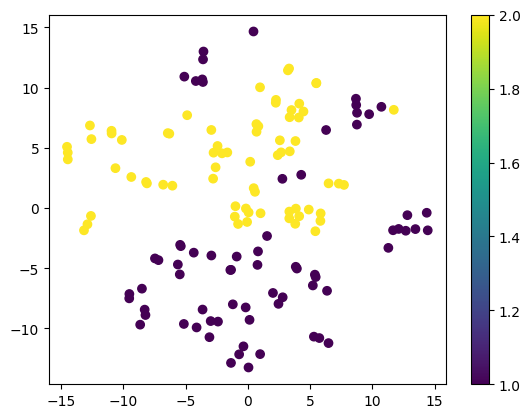

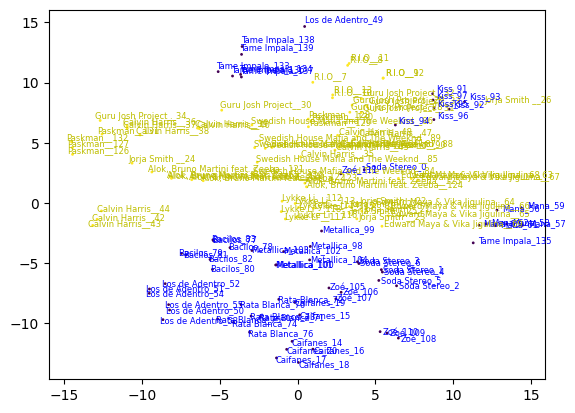

In [16]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [17]:
#reproducir audio
i = 96
Audio(x_t[i].T,rate=fs)

In [ ]:
i = 14
Audio(x_t[i].T,rate=fs)

In [19]:
import joblib
import os

# Verificar si el directorio 'modelo' ya existe
if not os.path.exists('modelo'):
    # Si no existe, crear el directorio
    os.mkdir('modelo')

# Definir las variables que deseas guardar en el modelo
filename_ = 'modelo/rock_vs_house'
model_ = {'Xw_': Xw_, 'fmax': fmax, 'label': label, 'name_c': name_c, 'vf': vf, 'fs': fs}

# Guardar el modelo usando joblib.dump
joblib.dump(model_, filename_ + ".pkl")

['modelo/rock_vs_house.pkl']

In [20]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])